<a href="https://colab.research.google.com/github/robbi621/praktikum-ML_-036-_-004-/blob/maintenance/Flower_Classification_with_TensorFlow_Using_CNN___Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#import zipfile, os

#local_zip = '/content/drive/MyDrive/budug asu/flowers'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('Dataset3')
#zip_ref.close()

In [3]:
data_dir = '/content/drive/MyDrive/budug asu/flowers'
print(os.listdir(data_dir))

['sunflower', 'rose', 'tulip', 'daisy', 'dandelion']


In [4]:
pip install split-folders

In [5]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/budug asu/flowers', output="Dataset2_split", seed=42, ratio=(.80, .19, .01), group_prefix=None)

Copying files: 4253 files [18:10,  3.90 files/s]


In [6]:
import os
base_dir = 'Dataset2_split'

In [7]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [8]:
train_sunflower = os.path.join(train_dir, 'sunflower')
train_daisy = os.path.join(train_dir, 'daisy')
train_rose = os.path.join(train_dir, 'rose')
train_tulip = os.path.join(train_dir, 'tulip')
train_dandelion = os.path.join(train_dir, 'dandelion')

In [9]:
val_sunflower = os.path.join(train_dir, 'sunflower')
val_daisy = os.path.join(train_dir, 'daisy')
val_rose = os.path.join(train_dir, 'rose')
val_tulip = os.path.join(train_dir, 'tulip')
val_dandelion = os.path.join(train_dir, 'dandelion')

In [10]:
test_sunflower = os.path.join(train_dir, 'sunflower')
test_daisy = os.path.join(train_dir, 'daisy')
test_rose = os.path.join(train_dir, 'rose')
test_tulip = os.path.join(train_dir, 'tulip')
test_dandelion = os.path.join(train_dir, 'dandelion')

In [11]:
print('total training sunflower images:', len(os.listdir(train_sunflower)))
print('total training daisy images:', len(os.listdir(train_daisy)))
print('total training rose images:', len(os.listdir(train_rose)))
print('total training tulip images:', len(os.listdir(train_tulip)))
print('total training dandelion images:', len(os.listdir(train_dandelion)))

total training sunflower images: 585
total training daisy images: 613
total training rose images: 627
total training tulip images: 764
total training dandelion images: 812


In [12]:
print('total validation sunflower images:', len(os.listdir(val_sunflower)))
print('total validation daisy images:', len(os.listdir(val_daisy)))
print('total validation rose images:', len(os.listdir(val_rose)))
print('total validation tulip images:', len(os.listdir(val_tulip)))
print('total validation dandelion images:', len(os.listdir(val_dandelion)))

total validation sunflower images: 585
total validation daisy images: 613
total validation rose images: 627
total validation tulip images: 764
total validation dandelion images: 812


In [13]:
print('total test sunflower images:', len(os.listdir(test_sunflower)))
print('total test daisy images:', len(os.listdir(test_daisy)))
print('total test rose images:', len(os.listdir(test_rose)))
print('total test tulip images:', len(os.listdir(test_tulip)))
print('total test dandelion images:', len(os.listdir(test_dandelion)))

total test sunflower images: 585
total test daisy images: 613
total test rose images: 627
total test tulip images: 764
total test dandelion images: 812


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 3399 images belonging to 5 classes.
Found 804 images belonging to 5 classes.
Found 47 images belonging to 5 classes.


In [16]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

model1 = Sequential([
                     Conv2D(32, kernel_size=3, activation='relu', input_shape=(250, 250, 3)),
                     MaxPool2D(2,2),

                     Conv2D(64, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),
                     BatchNormalization(),

                     Conv2D(128, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Conv2D(256, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Dropout(0.25),

                     Flatten(),

                     Dense(128, activation='relu'),
                     Dense(5, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 61, 61, 64)       256       
 ormalization)                                                   
                                                        

In [18]:
model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [19]:
import time

start=time.time()
history = model1.fit(train_generator,
          epochs=100,
          steps_per_epoch=10,
          validation_data=val_generator,
          verbose=1)

Epoch 1/100
10/10 [==============================] - 87s 9s/step - loss: 1.9644 - accuracy: 0.2250 - val_loss: 1.6013 - val_accuracy: 0.2600
Epoch 2/100
10/10 [==============================] - 83s 9s/step - loss: 1.5052 - accuracy: 0.3469 - val_loss: 1.5933 - val_accuracy: 0.2774
Epoch 3/100
10/10 [==============================] - 80s 8s/step - loss: 1.3793 - accuracy: 0.4156 - val_loss: 1.5799 - val_accuracy: 0.3545
Epoch 4/100
10/10 [==============================] - 80s 8s/step - loss: 1.3227 - accuracy: 0.4187 - val_loss: 1.5597 - val_accuracy: 0.4577
Epoch 5/100
10/10 [==============================] - 80s 8s/step - loss: 1.2429 - accuracy: 0.4531 - val_loss: 1.5491 - val_accuracy: 0.4204
Epoch 6/100
10/10 [==============================] - 80s 8s/step - loss: 1.2221 - accuracy: 0.4906 - val_loss: 1.5320 - val_accuracy: 0.5075
Epoch 7/100
10/10 [==============================] - 76s 8s/step - loss: 1.1810 - accuracy: 0.5051 - val_loss: 1.5282 - val_accuracy: 0.4328
Epoch 8/100
1

In [20]:
score = model1.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

107/107 [==============================] - 165s 2s/step - loss: 0.7577 - accuracy: 0.7276
Loss: 0.76
Accuracy: 0.73


In [21]:
score = model1.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

26/26 [==============================] - 31s 1s/step - loss: 0.7983 - accuracy: 0.6841
Loss: 0.80
Accuracy: 0.68


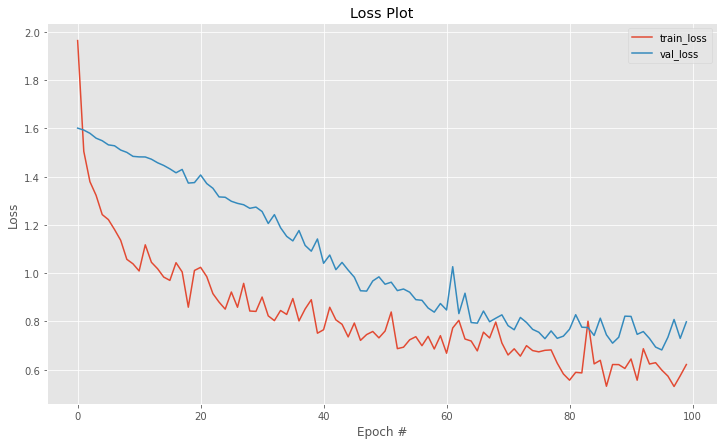

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

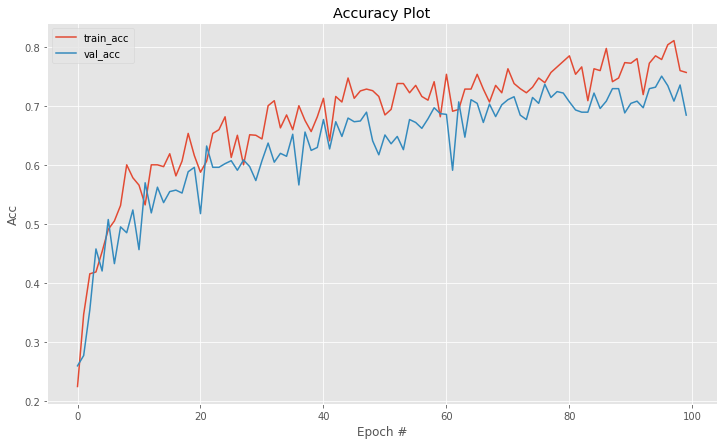

In [23]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [24]:
score = model1.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 2s 554ms/step - loss: 0.8570 - accuracy: 0.7021
Loss: 0.86
Accuracy: 0.70


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

pred = model1.predict(test_generator)
labels = (pred > 0.5).astype(np.int)

In [26]:
import tensorflow as tf

model_ann = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(250,250,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
])

model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 187500)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                6000032   
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 6,011,109
Trainable params: 6,011,109
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.optimizers import Adam

# Compile model
model_ann.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [28]:
start=time.time()
history2 = model_ann.fit(train_generator,
          epochs=100,
          validation_data=val_generator,
          verbose=1)

Epoch 1/100
107/107 [==============================] - 64s 591ms/step - loss: 1.5237 - accuracy: 0.3366 - val_loss: 1.3515 - val_accuracy: 0.3781
Epoch 2/100
107/107 [==============================] - 61s 569ms/step - loss: 1.3447 - accuracy: 0.4148 - val_loss: 1.2845 - val_accuracy: 0.4353
Epoch 3/100
107/107 [==============================] - 61s 570ms/step - loss: 1.3108 - accuracy: 0.4269 - val_loss: 1.3190 - val_accuracy: 0.4129
Epoch 4/100
107/107 [==============================] - 60s 558ms/step - loss: 1.2971 - accuracy: 0.4301 - val_loss: 1.2653 - val_accuracy: 0.4303
Epoch 5/100
107/107 [==============================] - 60s 564ms/step - loss: 1.2665 - accuracy: 0.4437 - val_loss: 1.2511 - val_accuracy: 0.4204
Epoch 6/100
107/107 [==============================] - 60s 561ms/step - loss: 1.2551 - accuracy: 0.4416 - val_loss: 1.2383 - val_accuracy: 0.4639
Epoch 7/100
107/107 [==============================] - 60s 561ms/step - loss: 1.2833 - accuracy: 0.4372 - val_loss: 1.2584 -

In [29]:
print("waktu = ", time.time() - start, "detik")

waktu =  7258.188858509064 detik


In [30]:
score = model_ann.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

107/107 [==============================] - 59s 553ms/step - loss: 1.0682 - accuracy: 0.5478
Loss: 1.07
Accuracy: 0.55


In [31]:
score = model_ann.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

26/26 [==============================] - 3s 122ms/step - loss: 1.1886 - accuracy: 0.4776
Loss: 1.19
Accuracy: 0.48


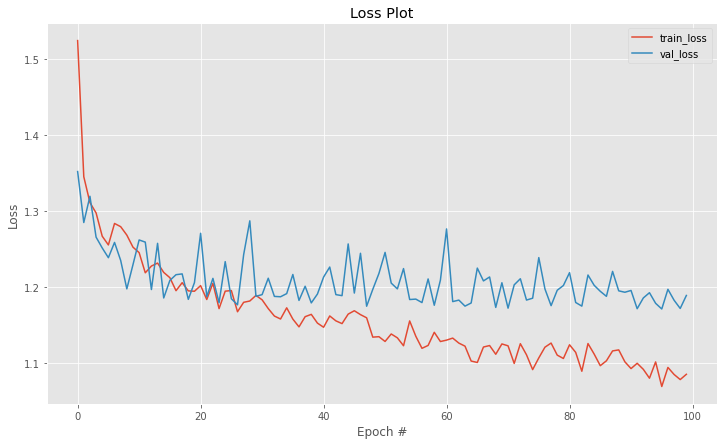

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history2.history["loss"], label="train_loss")
plt.plot(history2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

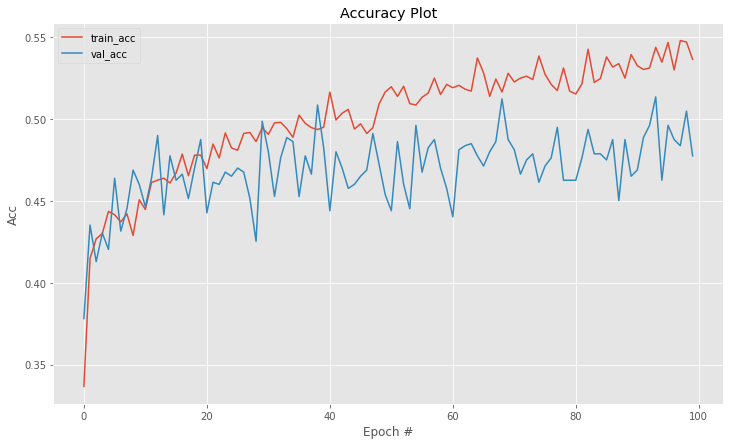

In [33]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history2.history["accuracy"], label="train_acc")
plt.plot(history2.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [34]:
score = model_ann.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 0s 93ms/step - loss: 1.3437 - accuracy: 0.3830
Loss: 1.34
Accuracy: 0.38


In [35]:
pred2 = model_ann.predict(test_generator)
labels = (pred2 > 0.5).astype(np.int)

In [36]:
# model1.save("model1_diabet.h5")
# model2.save("model2_diabet.h5")

In [37]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [38]:
%load_ext tensorboard

In [39]:
!rm -rf ./logs/

In [40]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([32,64,128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'rmsprop', 'adadelta']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [41]:
# xvl, yvl = zip(*(val_generator[i] for i in range(len(val_generator))))
# x_val, y_val = np.vstack(xvl), np.vstack(yvl)

In [42]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import InputLayer, Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

def train_test_model(hparams):
  model_hparams = Sequential()

  model_hparams.add(InputLayer(input_shape=[250,250,3]))

  model_hparams.add(Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu'))
  model_hparams.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
  model_hparams.add(BatchNormalization())
  model_hparams.add(MaxPool2D(pool_size=2, padding='same'))

  model_hparams.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
  model_hparams.add(BatchNormalization())
  model_hparams.add(MaxPool2D(pool_size=2, padding='same'))

  model_hparams.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
  model_hparams.add(BatchNormalization())
  model_hparams.add(MaxPool2D(pool_size=2, padding='same'))

  model_hparams.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
  model_hparams.add(BatchNormalization())
  model_hparams.add(MaxPool2D(pool_size=2, padding='same'))

  model_hparams.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
  model_hparams.add(BatchNormalization())
  model_hparams.add(MaxPool2D(pool_size=2, padding='same'))

  model_hparams.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
  model_hparams.add(BatchNormalization())
  model_hparams.add(MaxPool2D(pool_size=2, padding='same'))
  model_hparams.add(Dropout(hparams[HP_DROPOUT]))

  model_hparams.add(Flatten())

  # Fully Connected Layer
  model_hparams.add(Dense(hparams[HP_NUM_UNITS], activation='relu'))
  model_hparams.add(Dropout(hparams[HP_DROPOUT]))
  model_hparams.add(Dense(1, activation='softmax'))
  
  model_hparams.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )

  # model.fit(x_train, y_train, epochs=10) 
  model_hparams.fit(train_generator, epochs=50, validation_data=val_generator, verbose=1)
  _, accuracy = model_hparams.evaluate(x_val, y_val)
  return accuracy

In [43]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

In [44]:
['adam', 'sgd', 'adadelta', 'rmsprop', 'adamx', 'nadam']

['adam', 'sgd', 'adadelta', 'rmsprop', 'adamx', 'nadam']

In [45]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 32, 'dropout': 0.2, 'optimizer': 'adadelta'}
Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
# import zipfile

# hparams_demo_logs = zipfile.ZipFile('hparams_demo_logs.zip', 'r')
# hparams_demo_logs.extractall('logs/hparam_demo.zip')

# hparams_demo_logs.close()

In [ ]:
%%bash
wget -q 'https://storage.googleapis.com/download.tensorflow.org/tensorboard/hparams_demo_logs.zip'
unzip -q hparams_demo_logs.zip -d logs/hparam_demo

In [ ]:
%tensorboard --logdir logs/hparam_tuning